Best solution: [ 1.00000152 -1.00000153], Fitness: 0.9999999999953499
GIF saved as 'abc_optimization.gif'


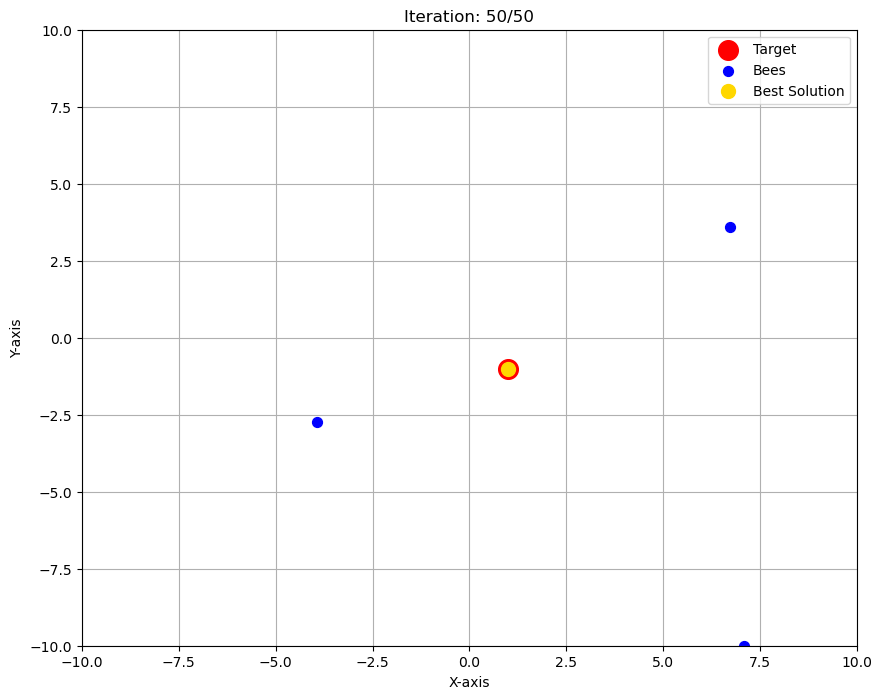

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
NUM_BEES = 30
NUM_ITERATIONS = 50
DIMENSIONS = 2
TARGET_ARRAY = np.array([1, -1])  # Target solution
LIMIT = 10  # Max trials before abandoning a food source

# Objective function (minimize distance to target)
def objective_function(x):
    return np.sum((x - TARGET_ARRAY) ** 2)

# Initialize food sources (solutions)
food_sources = np.random.uniform(low=-10, high=10, size=(NUM_BEES, DIMENSIONS))
fitness = np.array([1/(1 + objective_function(f)) for f in food_sources])
trials = np.zeros(NUM_BEES)  # Track abandonment

# Store history for animation
history = [food_sources.copy()]

# ABC Algorithm
for iteration in range(NUM_ITERATIONS):
    # Employed Bees Phase
    new_sources = food_sources.copy()
    for i in range(NUM_BEES):
        # Randomly select a neighbor (j != i)
        j = np.random.choice([k for k in range(NUM_BEES) if k != i])
        phi = np.random.uniform(-1, 1, DIMENSIONS)
        new_position = food_sources[i] + phi * (food_sources[i] - food_sources[j])
        new_position = np.clip(new_position, -10, 10)
        new_fitness = 1/(1 + objective_function(new_position))
        
        # Greedy selection
        if new_fitness > fitness[i]:
            food_sources[i] = new_position
            fitness[i] = new_fitness
            trials[i] = 0
        else:
            trials[i] += 1
    
    # Onlooker Bees Phase
    probabilities = fitness / np.sum(fitness)
    for _ in range(NUM_BEES):
        i = np.random.choice(NUM_BEES, p=probabilities)
        j = np.random.choice([k for k in range(NUM_BEES) if k != i])
        phi = np.random.uniform(-1, 1, DIMENSIONS)
        new_position = food_sources[i] + phi * (food_sources[i] - food_sources[j])
        new_position = np.clip(new_position, -10, 10)
        new_fitness = 1/(1 + objective_function(new_position))
        
        if new_fitness > fitness[i]:
            food_sources[i] = new_position
            fitness[i] = new_fitness
            trials[i] = 0
        else:
            trials[i] += 1
    
    # Scout Bees Phase
    for i in range(NUM_BEES):
        if trials[i] > LIMIT:
            food_sources[i] = np.random.uniform(-10, 10, DIMENSIONS)
            fitness[i] = 1/(1 + objective_function(food_sources[i]))
            trials[i] = 0
    
    history.append(food_sources.copy())

# Find the best solution
best_idx = np.argmax(fitness)
best_solution = food_sources[best_idx]
print(f"Best solution: {best_solution}, Fitness: {fitness[best_idx]}")

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_title("Artificial Bee Colony Optimization")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.grid(True)

# Plot target
target = ax.scatter(*TARGET_ARRAY, color='red', s=200, label='Target')

# Plot bees
bee_scatter = ax.scatter([], [], color='blue', s=50, label='Bees')
best_scatter = ax.scatter([], [], color='gold', s=100, label='Best Solution')

# Legend
ax.legend()

def update(frame):
    current_positions = history[frame]
    best_idx = np.argmax([1/(1 + objective_function(f)) for f in current_positions])
    bee_scatter.set_offsets(current_positions)
    best_scatter.set_offsets([current_positions[best_idx]])
    ax.set_title(f"Iteration: {frame + 1}/{NUM_ITERATIONS}")
    return bee_scatter, best_scatter

# Create and save GIF
ani = FuncAnimation(fig, update, frames=NUM_ITERATIONS, interval=200, blit=True)
ani.save("abc_optimization.gif", writer=PillowWriter(fps=10))
print("GIF saved as 'abc_optimization.gif'")
plt.show()